<a href="https://colab.research.google.com/github/lucastcor/Data_Science_and_ML/blob/main/LUNG_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Counting of **Duplicated** Lines

In [42]:
data=pd.read_csv('survey_lung_cancer.csv')
print(len(data))
print(data)

309
     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      MALE   69        0               1        1              0   
1      MALE   74        1               0        0              0   
2    FEMALE   59        0               0        0              1   
3      MALE   63        1               1        1              0   
4    FEMALE   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
304  FEMALE   56        0               0        0              1   
305    MALE   70        1               0        0              0   
306    MALE   58        1               0        0              0   
307    MALE   67        1               0        1              0   
308    MALE   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1 

In [35]:
data.duplicated().sum()

np.int64(33)

In [36]:
data.drop_duplicates(inplace=True)

In [28]:
data.duplicated().sum()

np.int64(0)

In [37]:
print(len(data))

276


# Processing Data

In [40]:
databin=[col for col in data.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]
data[databin]=data[databin].map(lambda x: 0 if x==1 else 1)

In [43]:
data['GENDER']=data['GENDER'].replace({'MALE':0, 'FEMALE':1}).astype(int)
data['LUNG_CANCER']=data['LUNG_CANCER'].replace({'YES':1, 'NO':0}).astype(int)

/tmp/ipython-input-1527548890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER']=data['GENDER'].replace({'MALE':0, 'FEMALE':1}).astype(int)
/tmp/ipython-input-1527548890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['LUNG_CANCER']=data['LUNG_CANCER'].replace({'YES':1, 'NO':0}).astype(int)


In [44]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [45]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [46]:
descricao=data.describe()
print(descricao['AGE'])

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64


In [47]:
print(descricao)

           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.475728   62.673139    0.563107        0.569579    0.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    0.000000        0.000000    0.000000   
25%      0.000000   57.000000    0.000000        0.000000    0.000000   
50%      0.000000   62.000000    1.000000        1.000000    0.000000   
75%      1.000000   69.000000    1.000000        1.000000    1.000000   
max      1.000000   87.000000    1.000000        1.000000    1.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        0.501618         0.504854    0.673139    0.556634    0.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         0.000000         0.000

# Plots and correlation analysis

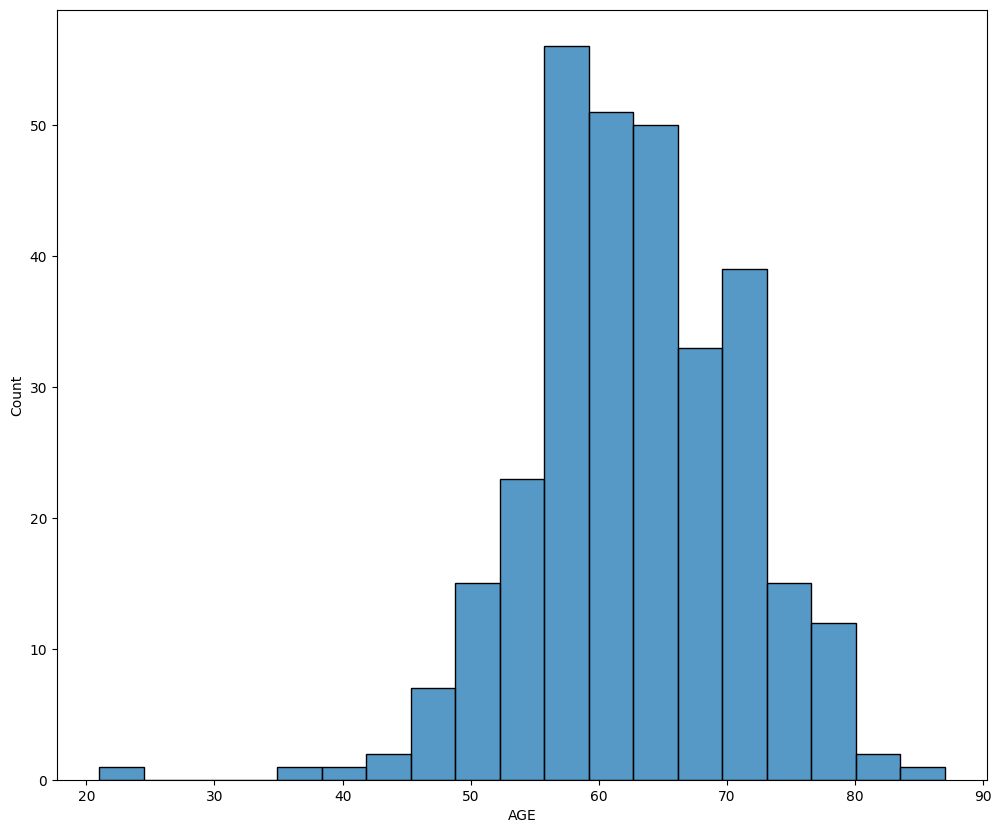

In [48]:
plt.figure(figsize=(12,10))
sns.histplot(x='AGE', data=data)
plt.show()

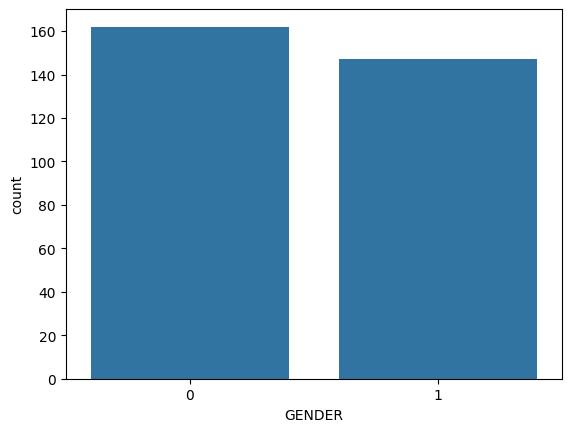

In [49]:
sns.countplot(x='GENDER', data=data)
plt.show()
# 1=F, 0=M

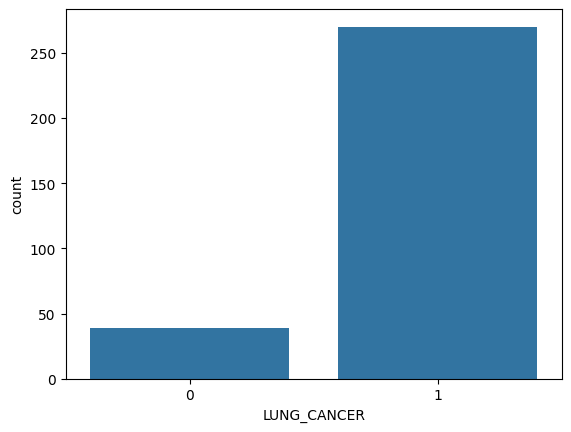

In [50]:
sns.countplot(x='LUNG_CANCER', data=data)
plt.show()
# 1=YES, 0=NO

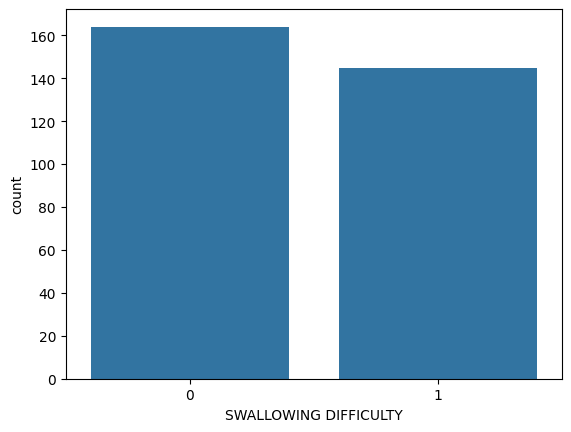

In [78]:
sns.countplot(x='SWALLOWING DIFFICULTY', data=data)
plt.show()
# 1=YES, 0=NO

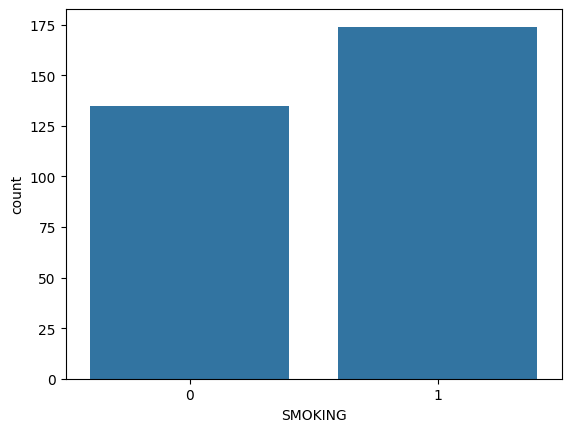

In [51]:
sns.countplot(x='SMOKING', data=data)
plt.show()
# 1=YES, 0=NO

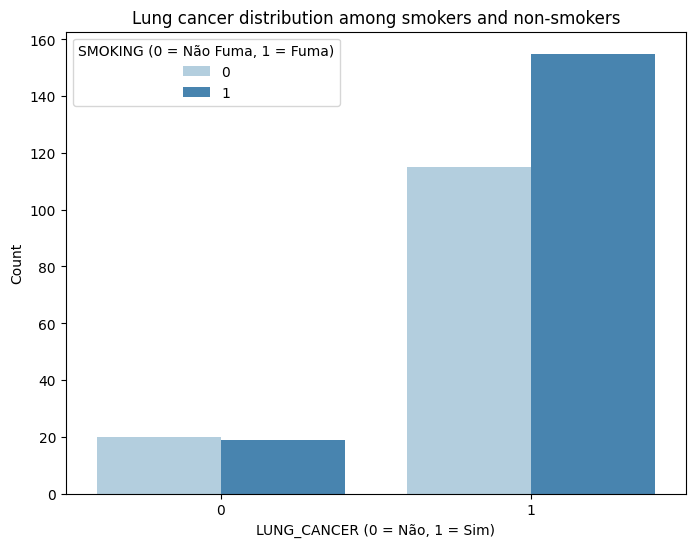

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LUNG_CANCER', hue='SMOKING', data=data, palette='Blues')
plt.title('Lung cancer distribution among smokers and non-smokers')
plt.xlabel('LUNG_CANCER (0 = Não, 1 = Sim)')
plt.ylabel('Count')
plt.legend(title='SMOKING (0 = Não Fuma, 1 = Fuma)', loc='upper left')
plt.show()


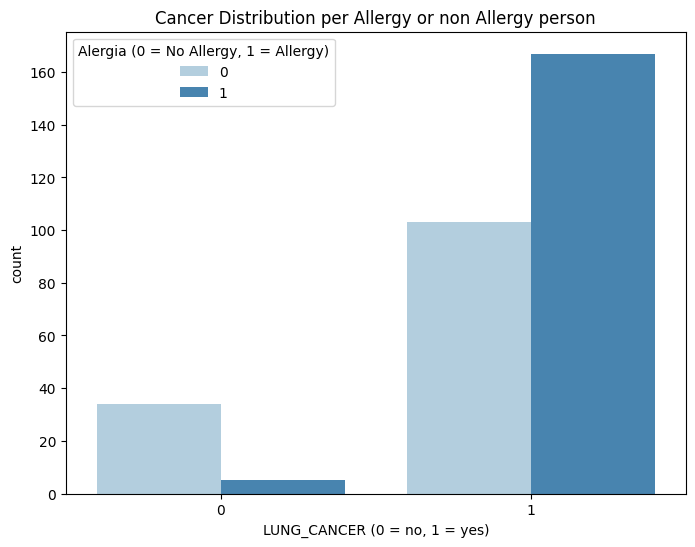

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LUNG_CANCER', hue='ALLERGY ', data=data, palette='Blues')
plt.title('Cancer Distribution per Allergy or non Allergy person')
plt.xlabel('LUNG_CANCER (0 = no, 1 = yes)')
plt.ylabel('count')
plt.legend(title='Alergia (0 = No Allergy, 1 = Allergy)', loc='upper left')
plt.show()


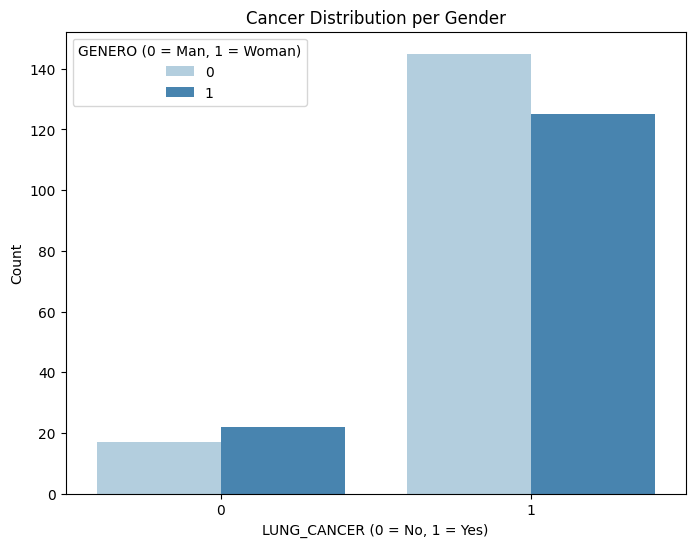

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LUNG_CANCER', hue='GENDER', data=data, palette='Blues')
plt.title('Cancer Distribution per Gender')
plt.xlabel('LUNG_CANCER (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='GENERO (0 = Man, 1 = Woman)', loc='upper left')
plt.show()

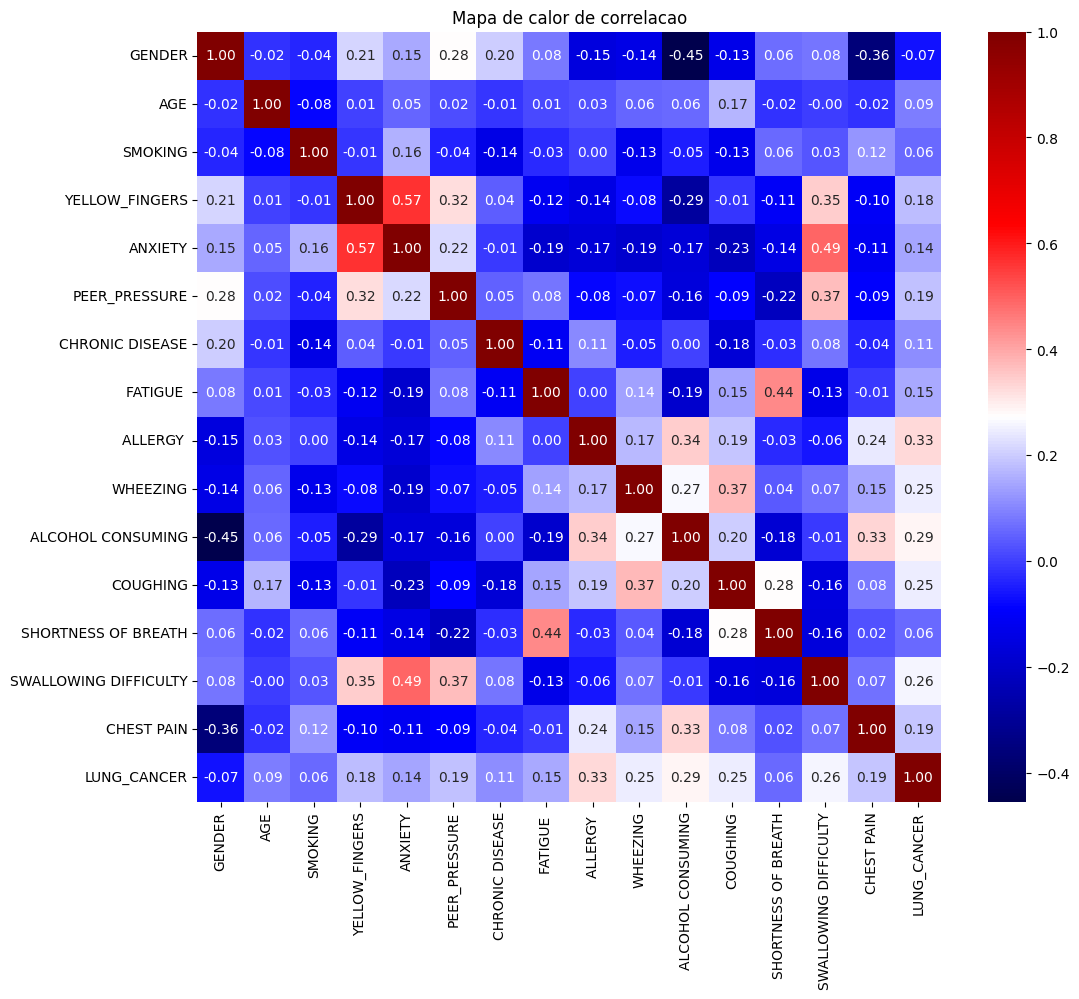

In [55]:
correlacao=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='seismic', cbar=True)
plt.title("Heatmap of correlaction")
plt.show()

# Linear Regression

In [75]:
print(correlacao)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.021306 -0.036277        0.212959  0.152127   
AGE                   -0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE        0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY               -0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING              -0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING     -0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING              -0.133

Choose the variables with the highest correlation

In [57]:
selecao = ['ALLERGY ', 'ALCOHOL CONSUMING', 'COUGHING', 'WHEEZING', 'CHEST PAIN', 'SWALLOWING DIFFICULTY']
X=data[selecao]
y=data['LUNG_CANCER']

Counting how much % the dataset be in the class 0 or 1 (not cancer/ cancer)

In [58]:
print(y.value_counts(normalize=True))

LUNG_CANCER
1    0.873786
0    0.126214
Name: proportion, dtype: float64


split the data for training and testing (70% training /30% testing (0.3))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create and Train the Logistic Regression Model, class_weigh to balance the model, since it was seen that class 0 (does not have cancer) is present in only 13% of the data (unbalanced data), it is a parameter in which the LogisticRegression function will place a weight under the variables of class 0

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
modelo_logistico = LogisticRegression(class_weight='balanced', random_state=42)
modelo_logistico.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [61]:
print("coeficientes:", modelo_logistico.coef_)
print("intercepto:", modelo_logistico.intercept_)

coeficientes: [[ 1.76193429  0.95573413  1.03476163  0.2590381  -0.08830012  2.12041508]]
intercepto: [-2.13286221]


make predictions

In [62]:
y_pred = modelo_logistico.predict(X_test)
y_pred_prob = modelo_logistico.predict_proba(X_test)[:, 1]


In [63]:
m=len(y_test)
def custoregressaologistica(y_test, y_pred_prob):
  return -1/m*np.sum(y_test*np.log(y_pred_prob)+(1-y_test)*np.log(1-y_pred_prob))

custo = custoregressaologistica(y_test, y_pred_prob)
print(custo)
#allows you to evaluate how good the model's predictions are/the mean error in probability

0.3286388568192233


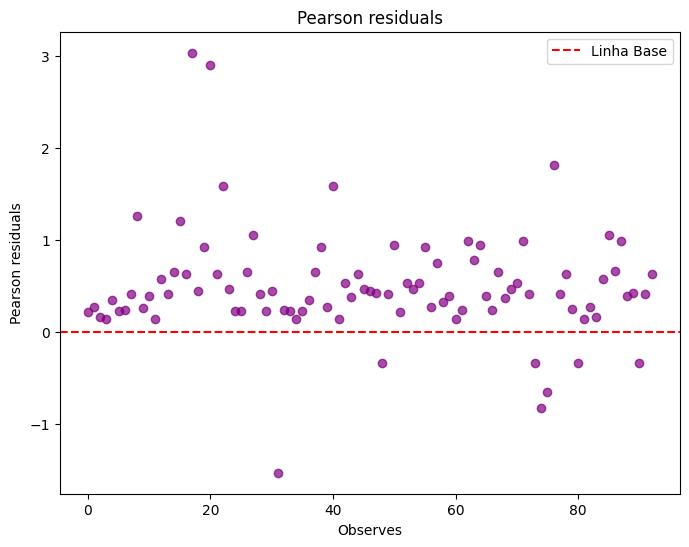

In [64]:

residuos_pearson = (y_test - y_pred_prob) / np.sqrt(y_pred_prob * (1 - y_pred_prob))

# Plotar os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuos_pearson)), residuos_pearson, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Linha Base')
plt.title('Pearson residuals')
plt.xlabel('Observes')
plt.ylabel('Pearson residuals')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

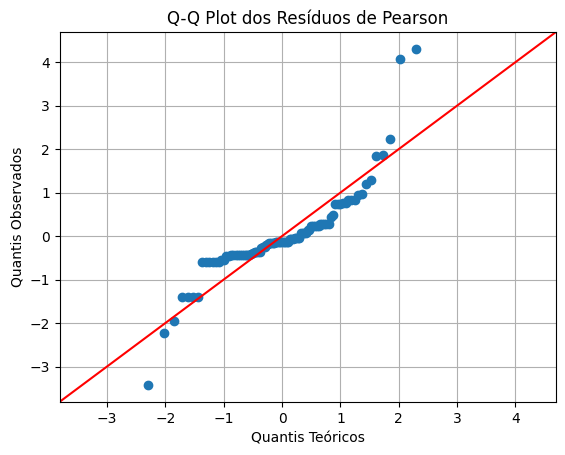

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

residuos_pearson2 = (y_test - y_pred_prob) / np.sqrt(y_pred_prob * (1 - y_pred_prob))


plt.figure(figsize=(8, 6))
sm.qqplot(residuos_pearson2, line='45', fit=True)
plt.title('Q-Q Plot dos Resíduos de Pearson')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.grid()
plt.show()


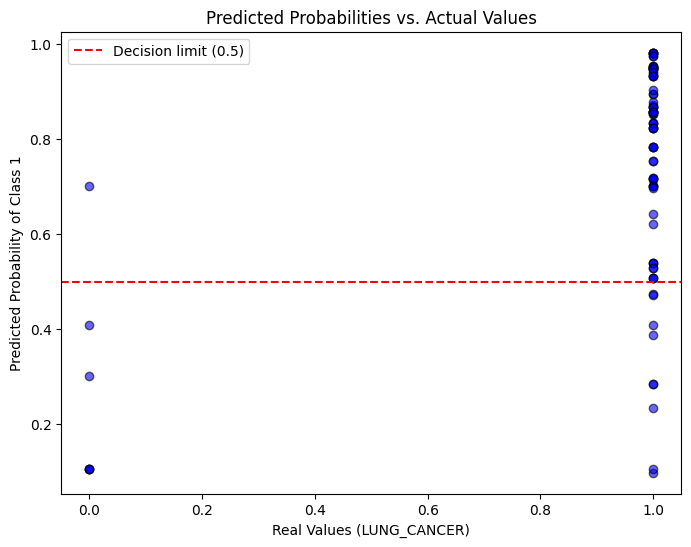

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_prob, alpha=0.6, color='blue', edgecolors='k')
plt.axhline(0.5, color='red', linestyle='--', label='Decision limit (0.5)')
plt.title('Predicted Probabilities vs. Actual Values')
plt.xlabel('Real Values (LUNG_CANCER)')
plt.ylabel('Predicted Probability of Class 1')
plt.legend()
plt.show()

In [67]:
acuracia=accuracy_score(y_test, y_pred)
print(acuracia)

0.8924731182795699


matriz de confusao, mostrando o resultado do modelo em predizer.

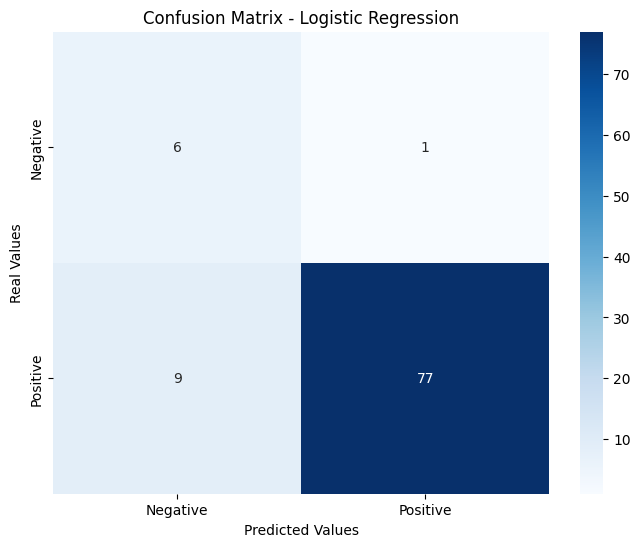

In [74]:
matrizconfusao=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrizconfusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.99      0.90      0.94        86

    accuracy                           0.89        93
   macro avg       0.69      0.88      0.74        93
weighted avg       0.94      0.89      0.91        93



The AUC is the area under the ROC curve and provides an overall metric of model performance.
The higher the AUC value, the better the model's classification.

In [70]:
auc=roc_auc_score(y_test, y_pred_prob)
print(auc)

0.9343853820598005


AUC-ROC graph showing the performance of a binary classification model (such as Logistic Regression)
FPR (False Positive Rate) on the X-axis
TPR (True Positive Rate) on the Y-axis

ROC curve (red line): The higher the value is above the blue diagonal line, the better the model.
The blue diagonal represents a model that makes random predictions (AUC = 0.5).

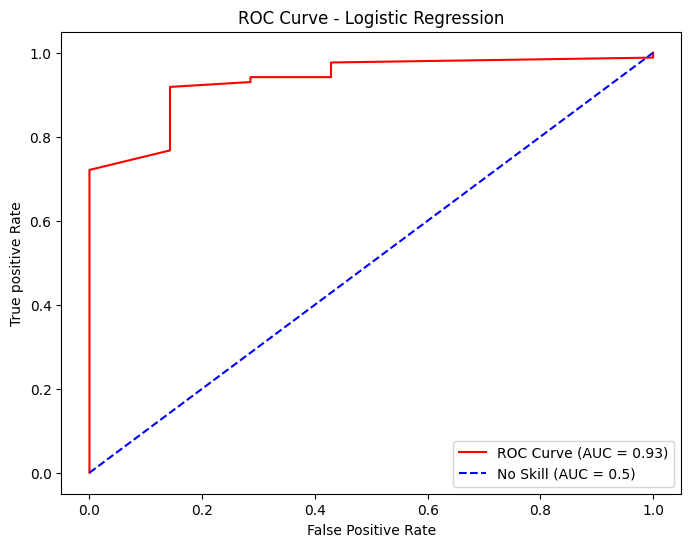

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='No Skill (AUC = 0.5)')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.legend()
plt.show()

Os coeficientes da regressão logística medem o impacto de cada variável na probabilidade de ocorrência da Classe 1 (tem câncer). Eles são interpretados em termos de log-odds.

In [72]:
coeficientes = pd.DataFrame({
    'Variables': X.columns,
    'Coeficient': modelo_logistico.coef_[0]
})
print(coeficientes)

               Variables  Coeficient
0               ALLERGY     1.761934
1      ALCOHOL CONSUMING    0.955734
2               COUGHING    1.034762
3               WHEEZING    0.259038
4             CHEST PAIN   -0.088300
5  SWALLOWING DIFFICULTY    2.120415


Transforming the coeficients into probability value

In [73]:
coeficientes['odds_Ratio'] = np.exp(coeficientes['Coeficient'])
print(coeficientes)

               Variables  Coeficient  odds_Ratio
0               ALLERGY     1.761934    5.823691
1      ALCOHOL CONSUMING    0.955734    2.600579
2               COUGHING    1.034762    2.814435
3               WHEEZING    0.259038    1.295683
4             CHEST PAIN   -0.088300    0.915486
5  SWALLOWING DIFFICULTY    2.120415    8.334596
